# DATA MINING PROJECT
<b>MUHAMMAD HAZIQ FAIZ BIN MOHD RIPIN 1201302740

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime 
import random

# 1. DATA CLEANING, PREPARATION AND TRANSFORMATION

### The first part will include the data cleaning, preparation and transformation of the dataset.
### As you can see below, the original dataset has a lot of missing values and spelling errors.

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,Wash_Item,Washer_No,Dryer_No,Spectacles,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,clothes,3,10,no,20.0,2.0,9.0,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,NaN,male,thin,32.0,no,no_kids,big,NaN,...,NaN,6,9,no,19.0,4.0,21.0,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,NaN,4,10,no,18.0,2.0,13.0,2.935533,101.737170,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,...,clothes,5,9,no,13.0,2.0,16.0,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,NaN,34.0,no,no_kids,big,blue,...,clothes,3,9,NaN,15.0,1.0,13.0,2.903530,101.661249,3.0


### Change the date column to datetime

In [3]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.dtypes

Date                 datetime64[ns]
Time                         object
Race                         object
Gender                       object
Body_Size                    object
Age_Range                   float64
With_Kids                    object
Kids_Category                object
Basket_Size                  object
Basket_colour                object
Attire                       object
Shirt_Colour                 object
shirt_type                   object
Pants_Colour                 object
pants_type                   object
Wash_Item                    object
Washer_No                     int64
Dryer_No                      int64
Spectacles                   object
TimeSpent_minutes           float64
buyDrinks                   float64
TotalSpent_RM               float64
latitude                    float64
longitude                   float64
Num_of_Baskets              float64
dtype: object

### Create df2, a subset of df that only contains object data type.

In [4]:
df2 = df.select_dtypes(include=['object'])
df2.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Spectacles
0,20:17:50,malay,male,moderate,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,no
1,20:28:42,NaN,male,thin,no,no_kids,big,NaN,casual,white,short_sleeve,blue_jeans,long,NaN,no
2,20:58:31,malay,female,moderate,no,no_kids,big,blue,casual,red,short_sleeve,black,long,NaN,no
3,21:31:28,indian,male,thin,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes,no
4,21:40:28,indian,male,NaN,no,no_kids,big,blue,casual,blue,NaN,white,long,clothes,NaN


### Remove the empty spaces  

In [5]:
for col in df2.columns:
    df2[col] = df[col].str.replace(' ','')
df2.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Spectacles
0,20:17:50,malay,male,moderate,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,no
1,20:28:42,NaN,male,thin,no,no_kids,big,NaN,casual,white,short_sleeve,blue_jeans,long,NaN,no
2,20:58:31,malay,female,moderate,no,no_kids,big,blue,casual,red,short_sleeve,black,long,NaN,no
3,21:31:28,indian,male,thin,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes,no
4,21:40:28,indian,male,NaN,no,no_kids,big,blue,casual,blue,NaN,white,long,clothes,NaN


### For categorical data, we fill thhe empty cell with a random value that we got from the unique values of its
### respective column

In [26]:
for col in df2.columns:
        data = df2[col]
        mask = data.isnull()
        samples = random.choices( data[~mask].values , k = mask.sum() )
        data[mask] = samples
df2.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Spectacles
0,20:17:50,malay,male,moderate,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,no
1,20:28:42,malay,male,thin,no,no_kids,big,purple,casual,white,short_sleeve,blue_jeans,long,clothes,no
2,20:58:31,malay,female,moderate,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,no
3,21:31:28,indian,male,thin,no,no_kids,big,black,casual,black,short_sleeve,yellow,short,clothes,no
4,21:40:28,indian,male,fat,no,no_kids,big,blue,casual,blue,longsleeve,white,long,clothes,yes


### Replace ; with :

In [7]:
for col in df2.columns:
    df2[col] = df2[col].str.replace(';',':')
df2.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Spectacles
0,20:17:50,malay,male,moderate,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,no
1,20:28:42,malay,male,thin,no,no_kids,big,purple,casual,white,short_sleeve,blue_jeans,long,clothes,no
2,20:58:31,malay,female,moderate,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,no
3,21:31:28,indian,male,thin,no,no_kids,big,black,casual,black,short_sleeve,yellow,short,clothes,no
4,21:40:28,indian,male,fat,no,no_kids,big,blue,casual,blue,longsleeve,white,long,clothes,yes


### Create df3, a subset of df with only numerical values

In [8]:
df3 = df.drop(df2.columns, axis=1)
df3.head()

,Date,Age_Range,Washer_No,Dryer_No,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets
0,2015-10-19,28.0,3,10,20.0,2.0,9.0,2.912316,101.657948,1.0
1,2015-10-19,32.0,6,9,19.0,4.0,21.0,2.922506,101.643129,3.0
2,2015-10-19,30.0,4,10,18.0,2.0,13.0,2.935533,101.737170,1.0
3,2015-10-19,51.0,5,9,13.0,2.0,16.0,2.949924,101.637069,1.0
4,2015-10-19,34.0,3,9,15.0,1.0,13.0,2.903530,101.661249,3.0


### For numerical data, we fill the empty value with the mean vallue of its column

In [9]:
for col in df3.columns:
    df3[col] = df3[col].fillna(df3[col].mean())
df3.head()

,Date,Age_Range,Washer_No,Dryer_No,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets
0,2015-10-19,28.0,3,10,20.0,2.0,9.0,2.912316,101.657948,1.0
1,2015-10-19,32.0,6,9,19.0,4.0,21.0,2.922506,101.643129,3.0
2,2015-10-19,30.0,4,10,18.0,2.0,13.0,2.935533,101.737170,1.0
3,2015-10-19,51.0,5,9,13.0,2.0,16.0,2.949924,101.637069,1.0
4,2015-10-19,34.0,3,9,15.0,1.0,13.0,2.903530,101.661249,3.0


In [10]:
df_normalized = pd.DataFrame()

### Normalize the numerical value using z-score normalization. Z value can defined as:
### $z = \frac{value-\mu}{\sigma}$

In [11]:
for col in df3.columns:
    if(col != "Date"):
        df_normalized[col] = stats.zscore(df3[col])
df_normalized.head()

,Age_Range,Washer_No,Dryer_No,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets
0,-0.979143,-1.329343,1.383455,-1.095669,-0.306655,-1.175289,-1.974354,0.219731,-1.24844
1,-0.635820,1.333782,0.483647,-1.165587,0.873818,1.620044,-1.844641,0.072282,1.25697
2,-0.807481,-0.441635,1.383455,-1.235504,-0.306655,-0.243511,-1.678802,1.008022,-1.24844
3,0.994965,0.446073,0.483647,-1.585093,-0.306655,0.455322,-1.495611,0.011978,-1.24844
4,-0.464158,-1.329343,0.483647,-1.445258,-0.896892,-0.243511,-2.086209,0.252582,1.25697


In [12]:
df_normalized["Date"]=df3["Date"]
df_normalized.head()

,Age_Range,Washer_No,Dryer_No,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,Date
0,-0.979143,-1.329343,1.383455,-1.095669,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,2015-10-19
1,-0.635820,1.333782,0.483647,-1.165587,0.873818,1.620044,-1.844641,0.072282,1.25697,2015-10-19
2,-0.807481,-0.441635,1.383455,-1.235504,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,2015-10-19
3,0.994965,0.446073,0.483647,-1.585093,-0.306655,0.455322,-1.495611,0.011978,-1.24844,2015-10-19
4,-0.464158,-1.329343,0.483647,-1.445258,-0.896892,-0.243511,-2.086209,0.252582,1.25697,2015-10-19


### Concatenate df2 and df_normalized to obtain a normalized df

In [13]:
df_normalized = pd.concat([df2,df_normalized],axis=1)
df_normalized.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,Age_Range,Washer_No,Dryer_No,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,Date
0,20:17:50,malay,male,moderate,yes,young,big,red,casual,blue,...,-0.979143,-1.329343,1.383455,-1.095669,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,2015-10-19
1,20:28:42,malay,male,thin,no,no_kids,big,purple,casual,white,...,-0.635820,1.333782,0.483647,-1.165587,0.873818,1.620044,-1.844641,0.072282,1.25697,2015-10-19
2,20:58:31,malay,female,moderate,no,no_kids,big,blue,casual,red,...,-0.807481,-0.441635,1.383455,-1.235504,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,2015-10-19
3,21:31:28,indian,male,thin,no,no_kids,big,black,casual,black,...,0.994965,0.446073,0.483647,-1.585093,-0.306655,0.455322,-1.495611,0.011978,-1.24844,2015-10-19
4,21:40:28,indian,male,fat,no,no_kids,big,blue,casual,blue,...,-0.464158,-1.329343,0.483647,-1.445258,-0.896892,-0.243511,-2.086209,0.252582,1.25697,2015-10-19


In [14]:
df = pd.concat([df2,df3],axis=1)
df.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,Date,Age_Range,Washer_No,Dryer_No,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets
0,20:17:50,malay,male,moderate,yes,young,big,red,casual,blue,...,2015-10-19,28.0,3,10,20.0,2.0,9.0,2.912316,101.657948,1.0
1,20:28:42,malay,male,thin,no,no_kids,big,purple,casual,white,...,2015-10-19,32.0,6,9,19.0,4.0,21.0,2.922506,101.643129,3.0
2,20:58:31,malay,female,moderate,no,no_kids,big,blue,casual,red,...,2015-10-19,30.0,4,10,18.0,2.0,13.0,2.935533,101.737170,1.0
3,21:31:28,indian,male,thin,no,no_kids,big,black,casual,black,...,2015-10-19,51.0,5,9,13.0,2.0,16.0,2.949924,101.637069,1.0
4,21:40:28,indian,male,fat,no,no_kids,big,blue,casual,blue,...,2015-10-19,34.0,3,9,15.0,1.0,13.0,2.903530,101.661249,3.0


### We decided to use an additional dataset that contain the dataset that contain the weather report for Kuala Lumpur from 2015 to 2017. The dataset can be downloaded here https://www.meteoblue.com/en/weather/archive/era5/kuala-lumpur_malaysia_1735161}

In [15]:
weather = pd.read_csv("weather.csv")
weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Kuala Lumpur,Malaysia",2015-01-01,31.9,24.0,27.1,36.7,24.0,28.6,23.6,82.5,...,13.1,6,NaN,2015-01-01T07:18:16,2015-01-01T19:14:48,0.43,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"48647099999,48650099999,WMSA,WMKK"
1,"Kuala Lumpur,Malaysia",2015-01-02,31.7,24.0,26.7,37.4,24.0,28.0,23.1,81.6,...,15.7,6,NaN,2015-01-02T07:18:43,2015-01-02T19:15:18,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"48647099999,48650099999,WMSA,WMKK"
2,"Kuala Lumpur,Malaysia",2015-01-03,32.0,24.1,26.9,37.6,24.1,28.4,23.6,83.6,...,17.1,7,NaN,2015-01-03T07:19:09,2015-01-03T19:15:47,0.49,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"48647099999,48650099999,WMSA,WMKK"
3,"Kuala Lumpur,Malaysia",2015-01-04,31.5,24.0,27.1,36.2,24.0,29.4,23.4,81.3,...,13.9,7,NaN,2015-01-04T07:19:36,2015-01-04T19:16:16,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"48647099999,48650099999,WMSA,WMKK"
4,"Kuala Lumpur,Malaysia",2015-01-05,32.8,25.0,28.1,38.0,25.0,30.9,24.0,79.4,...,12.7,5,NaN,2015-01-05T07:20:01,2015-01-05T19:16:44,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48647099999,48650099999,WMSA,WMKK"


### Only pick the column that we are interested in.

In [16]:
weather = weather[["datetime", "tempmax", "tempmin", "humidity","description", "icon"]]
weather.head()

,datetime,tempmax,tempmin,humidity,description,icon
0,2015-01-01,31.9,24.0,82.5,Cloudy skies throughout the day with rain.,rain
1,2015-01-02,31.7,24.0,81.6,Partly cloudy throughout the day with rain.,rain
2,2015-01-03,32.0,24.1,83.6,Partly cloudy throughout the day with early mo...,rain
3,2015-01-04,31.5,24.0,81.3,Partly cloudy throughout the day with early mo...,rain
4,2015-01-05,32.8,25.0,79.4,Partly cloudy throughout the day.,partly-cloudy-day


In [17]:
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather.dtypes

datetime       datetime64[ns]
tempmax               float64
tempmin               float64
humidity              float64
description            object
icon                   object
dtype: object

In [18]:
weather =weather.rename(columns = {'datetime':'Date'})
weather.head()

,Date,tempmax,tempmin,humidity,description,icon
0,2015-01-01,31.9,24.0,82.5,Cloudy skies throughout the day with rain.,rain
1,2015-01-02,31.7,24.0,81.6,Partly cloudy throughout the day with rain.,rain
2,2015-01-03,32.0,24.1,83.6,Partly cloudy throughout the day with early mo...,rain
3,2015-01-04,31.5,24.0,81.3,Partly cloudy throughout the day with early mo...,rain
4,2015-01-05,32.8,25.0,79.4,Partly cloudy throughout the day.,partly-cloudy-day


In [19]:
merged_df = pd.merge(df, weather, on="Date")
merged_df.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description,icon
0,20:17:50,malay,male,moderate,yes,young,big,red,casual,blue,...,2.0,9.0,2.912316,101.657948,1.0,31.9,26.1,81.6,Cloudy skies throughout the day.,cloudy
1,20:28:42,malay,male,thin,no,no_kids,big,purple,casual,white,...,4.0,21.0,2.922506,101.643129,3.0,31.9,26.1,81.6,Cloudy skies throughout the day.,cloudy
2,20:58:31,malay,female,moderate,no,no_kids,big,blue,casual,red,...,2.0,13.0,2.935533,101.737170,1.0,31.9,26.1,81.6,Cloudy skies throughout the day.,cloudy
3,21:31:28,indian,male,thin,no,no_kids,big,black,casual,black,...,2.0,16.0,2.949924,101.637069,1.0,31.9,26.1,81.6,Cloudy skies throughout the day.,cloudy
4,21:40:28,indian,male,fat,no,no_kids,big,blue,casual,blue,...,1.0,13.0,2.903530,101.661249,3.0,31.9,26.1,81.6,Cloudy skies throughout the day.,cloudy


### Normalized the data using z-score normalization

In [20]:
weather_normalized = weather
for col in weather_normalized.columns:
    if(weather_normalized[col].dtype=="float64"):
        weather_normalized[col] = stats.zscore(weather_normalized[col])
weather_normalized.head()

,Date,tempmax,tempmin,humidity,description,icon
0,2015-01-01,-0.804993,-1.150429,0.668057,Cloudy skies throughout the day with rain.,rain
1,2015-01-02,-0.945452,-1.150429,0.512190,Partly cloudy throughout the day with rain.,rain
2,2015-01-03,-0.734764,-1.050207,0.858561,Partly cloudy throughout the day with early mo...,rain
3,2015-01-04,-1.085910,-1.150429,0.460234,Partly cloudy throughout the day with early mo...,rain
4,2015-01-05,-0.172931,-0.148208,0.131181,Partly cloudy throughout the day.,partly-cloudy-day


### Merge the weather data with our original data

In [21]:
merged_df_normalized = pd.merge(df_normalized, weather_normalized, on="Date")
merged_df_normalized.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,TotalSpent_RM,latitude,longitude,Num_of_Baskets,Date,tempmax,tempmin,humidity,description,icon
0,20:17:50,malay,male,moderate,yes,young,big,red,casual,blue,...,-1.175289,-1.974354,0.219731,-1.24844,2015-10-19,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy
1,20:28:42,malay,male,thin,no,no_kids,big,purple,casual,white,...,1.620044,-1.844641,0.072282,1.25697,2015-10-19,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy
2,20:58:31,malay,female,moderate,no,no_kids,big,blue,casual,red,...,-0.243511,-1.678802,1.008022,-1.24844,2015-10-19,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy
3,21:31:28,indian,male,thin,no,no_kids,big,black,casual,black,...,0.455322,-1.495611,0.011978,-1.24844,2015-10-19,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy
4,21:40:28,indian,male,fat,no,no_kids,big,blue,casual,blue,...,-0.243511,-2.086209,0.252582,1.25697,2015-10-19,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy


In [22]:
merged_df.to_csv('merged.csv',index=False)

In [23]:
merged_df_normalized.to_csv('merged-normalized.csv',index=False)

# 2. REGRESSION

### This part will include the regression models that we trained using our data. The models that we are interested in are $\color{red}{\text{linear regression}}$ and $\color{red}{\text{lasso regression}}$. We used $\color{red}{\text{recursive feature elimination}}$ to select the best features.

### There are 3 questions that this section would tackle. The questions are:
### i. $\color{red}{\text{Can we predict how much a laundromat customer would spend using the given data}}$
### ii. $\color{red}{\text{What are the difference between linear and lasso regression when it comes to answering the first question.}}$
### iii. $\color{red}{\text{What is the impact of using different numbers of features provided by RFE?}}$
### iv. $\color{red}{\text{What is the impact of using different values of alpha for lasso regression?}}$

In [27]:
import pandas as pd
import numpy as np
import imblearn
import scipy.stats as stats
from datetime import datetime 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import scipy.stats as stats

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

### Load the dataset and we noticed that it needs a little bit more cleaning and transformation. 

In [49]:
df = pd.read_csv("merged-normalized.csv")
df = df.drop(["Date"],axis=1)
df["Time"]=pd.to_datetime(df["Time"], format='%H:%M:%S').dt.hour
#df["Time"] = stats.zscore(df["Time"])
df.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description,icon
0,20,malay,male,moderate,yes,young,big,red,casual,blue,...,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy
1,20,malay,male,thin,no,no_kids,big,purple,casual,white,...,0.873818,1.620044,-1.844641,0.072282,1.25697,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy
2,20,malay,female,moderate,no,no_kids,big,blue,casual,red,...,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy
3,21,indian,male,thin,no,no_kids,big,black,casual,black,...,-0.306655,0.455322,-1.495611,0.011978,-1.24844,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy
4,21,indian,male,fat,no,no_kids,big,blue,casual,blue,...,-0.896892,-0.243511,-2.086209,0.252582,1.25697,-0.804993,0.954235,0.51219,Cloudy skies throughout the day.,cloudy


### Label encode the categorical columns.

In [50]:
#Label encode
label_encoder = preprocessing.LabelEncoder()
for col in df:
    if df[col].dtype == "object":
        df[col]=label_encoder.fit_transform(df[col])
        
df.rename(columns = {'icon':'weather'}, inplace = True)
df.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description,weather
0,20,3,1,1,1,3,0,8,0,1,...,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,-0.804993,0.954235,0.51219,3,0
1,20,3,1,2,0,1,0,7,0,9,...,0.873818,1.620044,-1.844641,0.072282,1.25697,-0.804993,0.954235,0.51219,3,0
2,20,3,0,1,0,1,0,1,0,8,...,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,-0.804993,0.954235,0.51219,3,0
3,21,2,1,2,0,1,0,0,0,0,...,-0.306655,0.455322,-1.495611,0.011978,-1.24844,-0.804993,0.954235,0.51219,3,0
4,21,2,1,0,0,1,0,1,0,1,...,-0.896892,-0.243511,-2.086209,0.252582,1.25697,-0.804993,0.954235,0.51219,3,0


### Normalized the label encoded dataset.

In [51]:
df =stats.zscore(df)
df.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description,weather
0,1.186818,1.279978,1.009041,0.003386,1.110019,1.512059,-0.849654,0.876722,-1.069717,-1.086611,...,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,-0.729131,1.755352,0.320483,-1.616516,-4.855973
1,1.186818,1.279978,1.009041,1.234541,-0.900885,-0.542369,-0.849654,0.570658,-1.069717,1.258698,...,0.873818,1.620044,-1.844641,0.072282,1.25697,-0.729131,1.755352,0.320483,-1.616516,-4.855973
2,1.186818,1.279978,-0.991040,0.003386,-0.900885,-0.542369,-0.849654,-1.265730,-1.069717,0.965535,...,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,-0.729131,1.755352,0.320483,-1.616516,-4.855973
3,1.330305,0.401626,1.009041,1.234541,-0.900885,-0.542369,-0.849654,-1.571795,-1.069717,-1.379775,...,-0.306655,0.455322,-1.495611,0.011978,-1.24844,-0.729131,1.755352,0.320483,-1.616516,-4.855973
4,1.330305,0.401626,1.009041,-1.227769,-0.900885,-0.542369,-0.849654,-1.265730,-1.069717,-1.086611,...,-0.896892,-0.243511,-2.086209,0.252582,1.25697,-0.729131,1.755352,0.320483,-1.616516,-4.855973


### Get the X and y columns.

In [52]:
X = df.drop(["TotalSpent_RM"],axis=1)
y = df["TotalSpent_RM"]
colnames = X.columns

### Split the dataset into training and testing

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Create a linear regression model and a reversefeature eliminitaion model with cross validation (RFECV). In the case below we choose the 10 best features with a cross validation value of 3. We use $r^2$ scoring.

In [54]:
lr = LinearRegression()
rfe = RFECV(lr, min_features_to_select=10, cv=3, scoring="r2")

In [55]:
rfe.fit(X,y)

RFECV(cv=3, estimator=LinearRegression(), min_features_to_select=10,
      scoring='r2')

### This is a function to display the score of the features sorted decreasingly.

In [56]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler() # everything will be between 0 and 1
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

### Display the feature score we got from RFE.

In [57]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
rfe_score

,Features,Score
0,Time,1.00
11,Pants_Colour,1.00
2,Gender,1.00
22,Num_of_Baskets,1.00
15,Age_Range,1.00
5,Kids_Category,1.00
1,Race,1.00
7,Basket_colour,1.00
13,Wash_Item,1.00
12,pants_type,1.00


### Display whether a feature is selected or not.

In [58]:
for i in range(X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 15.000
Column: 4, Selected False, Rank: 16.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 12.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 11.000
Column: 9, Selected False, Rank: 17.000
Column: 10, Selected False, Rank: 4.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 2.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected False, Rank: 13.000
Column: 17, Selected False, Rank: 8.000
Column: 18, Selected False, Rank: 10.000
Column: 19, Selected False, Rank: 3.000
Column: 20, Selected False, Rank: 5.000
Column: 21, Selected False, Rank: 9.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected False, Rank: 18.000
Column: 24, Selected False, Rank: 19.000
Column: 25,

### Create a new dataframe that ony contain the selected features.

In [59]:
from sklearn.model_selection import ShuffleSplit

optimal_X = X.iloc[:, rfe.support_]
optimal_X

,Time,Race,Gender,Kids_Category,Basket_colour,Pants_Colour,pants_type,Wash_Item,Age_Range,Num_of_Baskets
0,1.186818,1.279978,1.009041,1.512059,0.876722,-1.182103,1.089490,0.870327,-0.979143,-1.248440
1,1.186818,1.279978,1.009041,-0.542369,0.570658,-0.635434,-0.917861,0.870327,-0.635820,1.256970
2,1.186818,1.279978,-0.991040,-0.542369,-1.265730,-1.182103,-0.917861,0.870327,-0.807481,-1.248440
3,1.330305,0.401626,1.009041,-0.542369,-1.571795,1.824575,1.089490,0.870327,0.994965,-1.248440
4,1.330305,0.401626,1.009041,-0.542369,-1.265730,1.551241,-0.917861,0.870327,-0.464158,1.256970
...,...,...,...,...,...,...,...,...,...,...
3995,1.473792,-1.355078,1.009041,-0.542369,-0.041472,-0.908768,1.089490,-1.148993,-0.120835,0.004265
3996,-0.104566,0.401626,1.009041,-1.569583,-0.959666,1.824575,-0.917861,0.870327,1.338288,0.004265
3997,1.617279,0.401626,1.009041,1.512059,-1.571795,-1.182103,1.089490,0.870327,1.595781,-1.248440
3998,-0.678515,-1.355078,1.009041,0.484845,-0.041472,1.824575,1.089490,-1.148993,-1.150805,1.256970


### Evaluate the model using the optimal data with shuffle split cross validation technique.
### We got an $r^2$ score of 0.007 which is very bad. A model with an $r^2$ score of below than 0.5 is deemed nusable. This answers question (i), we can't use linear regression to predict the  how much a laundromat customer would spend .

In [67]:
# evaluate model
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
n_scores = cross_val_score(lr,optimal_X, y, cv=cv, scoring='r2')
# report performance
print('R2: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

R2: -0.007 (0.003)


### Now we repeat the same procedure with lasso regression with $\alpha$ value of 0.9
###  Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients by introducing a lasso penalty.
### We hope that lasso regression would give a higher $r^2$ score.

In [61]:
lasso = Lasso(alpha=0.9)
rfe2 = RFECV(lasso, cv=3, min_features_to_select=10, scoring="r2")

In [62]:
rfe2.fit(X,y)

RFECV(cv=3, estimator=Lasso(alpha=0.9), min_features_to_select=10, scoring='r2')

### Display the features along with their rfe score.

In [63]:
rfe_score = ranking(list(map(float, rfe2.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
rfe_score

,Features,Score
27,weather,1.00
26,description,1.00
25,humidity,1.00
24,tempmin,1.00
23,tempmax,1.00
22,Num_of_Baskets,1.00
21,longitude,1.00
20,latitude,1.00
19,buyDrinks,1.00
18,TimeSpent_minutes,1.00


### Display the accepted features

In [64]:
for i in range(X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe2.support_[i], rfe2.ranking_[i]))


Column: 0, Selected False, Rank: 19.000
Column: 1, Selected False, Rank: 18.000
Column: 2, Selected False, Rank: 17.000
Column: 3, Selected False, Rank: 16.000
Column: 4, Selected False, Rank: 15.000
Column: 5, Selected False, Rank: 14.000
Column: 6, Selected False, Rank: 13.000
Column: 7, Selected False, Rank: 12.000
Column: 8, Selected False, Rank: 11.000
Column: 9, Selected False, Rank: 10.000
Column: 10, Selected False, Rank: 9.000
Column: 11, Selected False, Rank: 8.000
Column: 12, Selected False, Rank: 7.000
Column: 13, Selected False, Rank: 6.000
Column: 14, Selected False, Rank: 5.000
Column: 15, Selected False, Rank: 4.000
Column: 16, Selected False, Rank: 3.000
Column: 17, Selected False, Rank: 2.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column:

In [66]:
optimal_X = X.iloc[:, rfe2.support_]
optimal_X

,TimeSpent_minutes,buyDrinks,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description,weather
0,-1.095669,-0.306655,-1.974354,0.219731,-1.248440,-0.729131,1.755352,0.320483,-1.616516,-4.855973
1,-1.165587,0.873818,-1.844641,0.072282,1.256970,-0.729131,1.755352,0.320483,-1.616516,-4.855973
2,-1.235504,-0.306655,-1.678802,1.008022,-1.248440,-0.729131,1.755352,0.320483,-1.616516,-4.855973
3,-1.585093,-0.306655,-1.495611,0.011978,-1.248440,-0.729131,1.755352,0.320483,-1.616516,-4.855973
4,-1.445258,-0.896892,-2.086209,0.252582,1.256970,-0.729131,1.755352,0.320483,-1.616516,-4.855973
...,...,...,...,...,...,...,...,...,...,...
3995,0.722193,1.464055,0.507268,0.156118,0.004265,-1.404827,0.284508,0.551104,-0.098482,0.512215
3996,-1.515175,-1.487129,0.516629,0.368160,0.004265,-1.404827,0.284508,0.551104,-0.098482,0.512215
3997,1.071782,-0.306655,0.544276,0.217933,-1.248440,-1.404827,0.284508,0.551104,-0.098482,0.512215
3998,-0.186738,0.873818,0.912267,0.384060,1.256970,-1.404827,0.284508,0.551104,-0.098482,0.512215


### Lasso regression barely improved the $r^2$ score. Both regression models are proven to be unusable to predict how much a customer would spend.

In [68]:
# evaluate model
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
n_scores = cross_val_score(lasso,optimal_X, y, cv=cv, scoring='r2')
# report performance
print('R2: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

R2: -0.002 (0.002)


### Further experiments are conducted in our streamllit app and the detail answers to our question can be found in our report.

# 3. CLUSTERING

### This part will include the clustering model that we trained using our data. The clustering model that we are interested in is $\color{red}{\text{k-nearest neighbour}}$. 

### There are 5 questions that this section would tackle. The questions are:
### i. $\color{red}{\text{Can we predict the weather using given data using a clustering model suc as KNN}}$
### ii. $\color{red}{\text{What are the affect of changing the value of k?}}$
### iii. $\color{red}{\text{Can we get the optimal value of k using Grid Search.}}$
### iv. $\color{red}{\text{Can we plot the confusion matrix, ROC curve and precision-recall curve of multiclass data?}}$
### v. $\color{red}{\text{Can we improve the performance of the model by improving the balance of the data using SMOTE, random undersampling and random oversampling?}}$

In [3]:
import pandas as pd
import numpy as np
from collections import Counter

from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from datetime import datetime 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import scipy.stats as stats

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

### Read the csv file

In [4]:
df = pd.read_csv("merged-normalized.csv")
df = df.drop(["Date"],axis=1)
df["Time"]=pd.to_datetime(df["Time"], format='%H:%M:%S').dt.hour
#df["Time"] = stats.zscore(df["Time"])
df.head()
df.rename(columns = {'icon':'weather'}, inplace = True)

### Get the X and y columns

In [5]:
X = df.drop(["weather"],axis=1)
y = df["weather"]
colnames = X.columns

### Label encode the X dataframe

In [6]:
#Label encode
label_encoder = preprocessing.LabelEncoder()
for col in X:
    if X[col].dtype == "object" and col!="weather":
        X[col]=label_encoder.fit_transform(X[col])
X.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description
0,20,3,1,1,1,3,0,8,0,1,...,-1.095669,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,-0.804993,0.954235,0.51219,3
1,20,3,1,2,0,1,0,7,0,9,...,-1.165587,0.873818,1.620044,-1.844641,0.072282,1.25697,-0.804993,0.954235,0.51219,3
2,20,3,0,1,0,1,0,1,0,8,...,-1.235504,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,-0.804993,0.954235,0.51219,3
3,21,2,1,2,0,1,0,0,0,0,...,-1.585093,-0.306655,0.455322,-1.495611,0.011978,-1.24844,-0.804993,0.954235,0.51219,3
4,21,2,1,0,0,1,0,1,0,1,...,-1.445258,-0.896892,-0.243511,-2.086209,0.252582,1.25697,-0.804993,0.954235,0.51219,3


### Normalize the X dataframe

In [7]:
X =stats.zscore(X)
X.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description
0,1.186818,1.279978,1.009041,0.003386,1.110019,1.512059,-0.849654,0.876722,-1.069717,-1.086611,...,-1.095669,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,-0.729131,1.755352,0.320483,-1.616516
1,1.186818,1.279978,1.009041,1.234541,-0.900885,-0.542369,-0.849654,0.570658,-1.069717,1.258698,...,-1.165587,0.873818,1.620044,-1.844641,0.072282,1.25697,-0.729131,1.755352,0.320483,-1.616516
2,1.186818,1.279978,-0.991040,0.003386,-0.900885,-0.542369,-0.849654,-1.265730,-1.069717,0.965535,...,-1.235504,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,-0.729131,1.755352,0.320483,-1.616516
3,1.330305,0.401626,1.009041,1.234541,-0.900885,-0.542369,-0.849654,-1.571795,-1.069717,-1.379775,...,-1.585093,-0.306655,0.455322,-1.495611,0.011978,-1.24844,-0.729131,1.755352,0.320483,-1.616516
4,1.330305,0.401626,1.009041,-1.227769,-0.900885,-0.542369,-0.849654,-1.265730,-1.069717,-1.086611,...,-1.445258,-0.896892,-0.243511,-2.086209,0.252582,1.25697,-0.729131,1.755352,0.320483,-1.616516


### Count the number of target classes, we can see that it is very imbalanced.

In [8]:
Counter(y)

Counter({'cloudy': 52, 'fog': 60, 'rain': 3019, 'partly-cloudy-day': 869})

### We construct a knn model without doing anything to fix the imbalance. this would act as our baseline model. 

In [9]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

### Find the out the effect of changing the number of neighbors on knn model trained on imbalanced dataset.

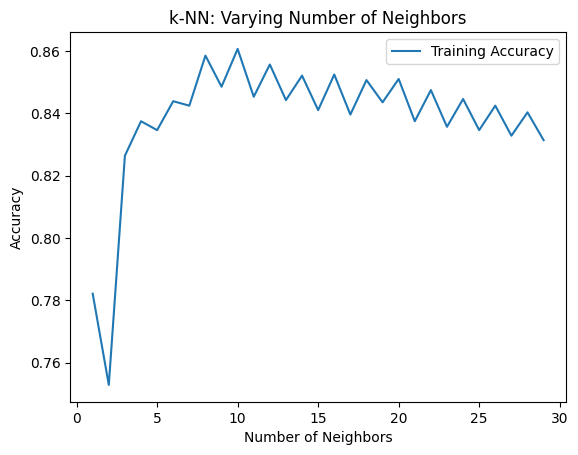

In [10]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    
    #Compute accuracy on the training set
    train_accuracy[i] = np.mean(cv_scores)

    #Compute accuracy on the testing set
    #test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
#plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Run a GridSearch model to get the number of neighbor with the highest accuracy

In [11]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [12]:
knn_gscv.best_params_

{'n_neighbors': 10}

In [13]:
knn_gscv.best_score_

0.8607142857142858

### The 2 cells below are for constructing a confusion matrix ofour knn model with 10 neighbors

In [14]:
y_score = knn_gscv.fit(X_train, y_train).predict_proba(X_test)
y_predict = knn_gscv.fit(X_train, y_train).predict(X_test)

/home/haziqfaiz/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


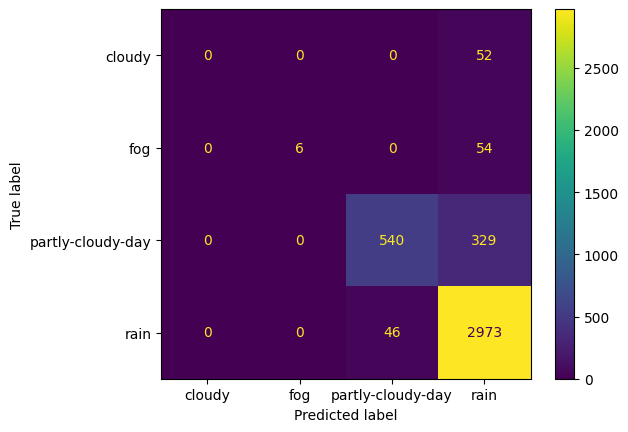

In [15]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, precision_recall_curve
plot_confusion_matrix(knn_gscv.best_estimator_, X_test, y_test)

### ROC Curve is usually used for binary classes. For multi-classes data, we have to binarize the classes and plot the ROC curve for every one of them.

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
y_test_bin = label_binarize(y_test, classes=["rain","cloudy","fog","partly-cloudy-day"])
n_classes = y_test_bin.shape[1]

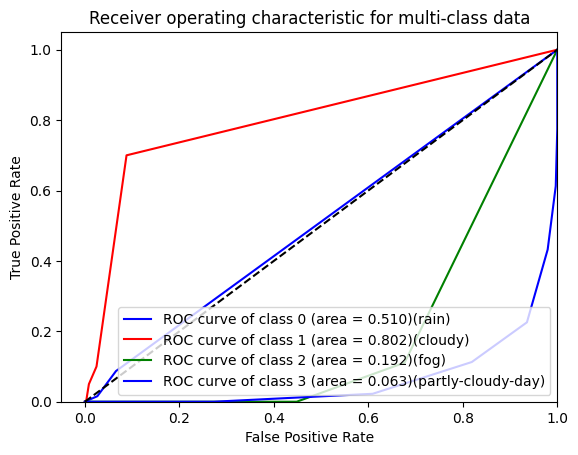

In [17]:
fpr = dict()
tpr = dict()
roc_auc = dict()
classes_name=["rain","cloudy","fog","partly-cloudy-day"]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"ROC curve of class {i} (area = {roc_auc[i]:.3f})({classes_name[i]})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### The same thing goes for presicion-recall curve

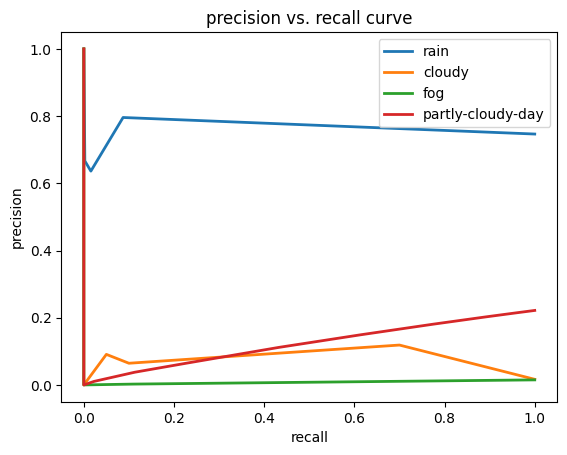

In [18]:
classes_name=["rain","cloudy","fog","partly-cloudy-day"]
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(classes_name[i]))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

### Next we train the same model but this time we transform the original dataset using Synthetic Minority Oversampling Technique (SMOTE) to adress the balance issue. SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b. This procedure can be used to create as many synthetic examples for the minority class as are required.

In [19]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [20]:
Counter(y_smote)

Counter({'cloudy': 3019, 'fog': 3019, 'rain': 3019, 'partly-cloudy-day': 3019})

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state=1)

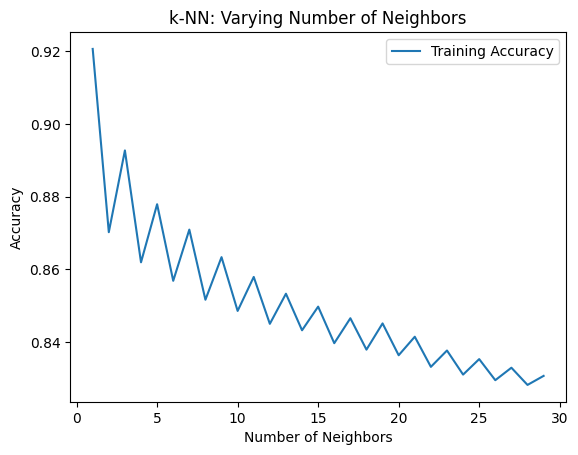

In [22]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    
    #Compute accuracy on the training set
    train_accuracy[i] = np.mean(cv_scores)

    #Compute accuracy on the testing set
    #test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
#plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [23]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [24]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [25]:
knn_gscv.best_score_

0.9206201995248076

In [26]:
y_score = knn_gscv.fit(X_train, y_train).predict_proba(X_test)
y_predict = knn_gscv.fit(X_train, y_train).predict(X_test)

/home/haziqfaiz/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


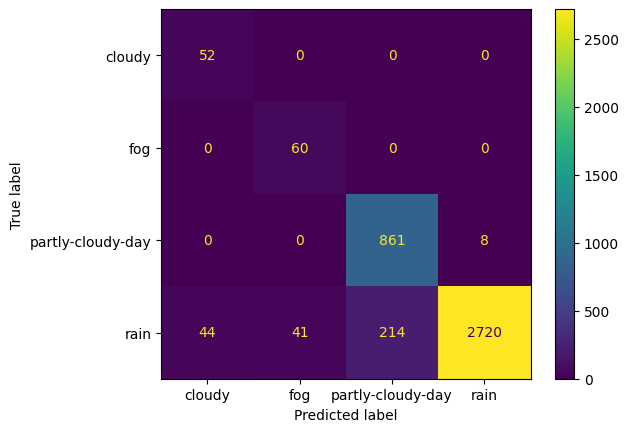

In [27]:
plot_confusion_matrix(knn_gscv.best_estimator_, X_test, y_test)

In [28]:
y_test_bin = label_binarize(y_test, classes=["rain","cloudy","fog","partly-cloudy-day"])
n_classes = y_test_bin.shape[1]

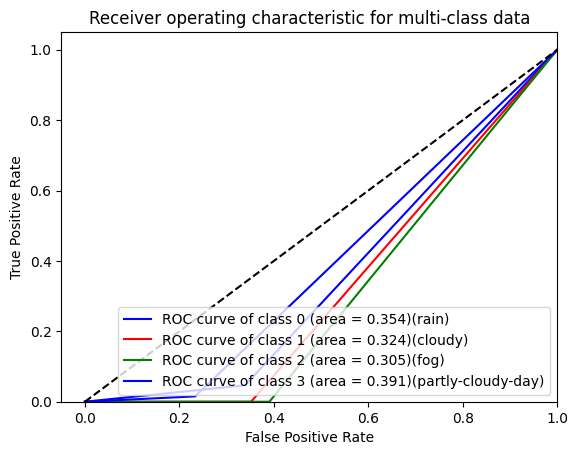

In [29]:
fpr = dict()
tpr = dict()
roc_auc = dict()
classes_name=["rain","cloudy","fog","partly-cloudy-day"]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"ROC curve of class {i} (area = {roc_auc[i]:.3f})({classes_name[i]})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

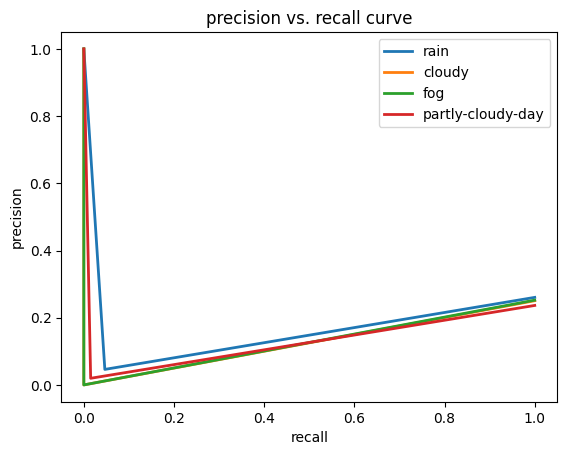

In [30]:
classes_name=["rain","cloudy","fog","partly-cloudy-day"]
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(classes_name[i]))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

### We train the same model but this time we transform the original dataset using random undersampling. In our case, the majority classes will be randomly undersampled. 

In [32]:
undersample = RandomUnderSampler(sampling_strategy="majority")
X_under, y_under = undersample.fit_resample(X, y)

In [33]:
Counter(y_under)

Counter({'cloudy': 52, 'fog': 60, 'partly-cloudy-day': 869, 'rain': 52})

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.3, random_state=1)

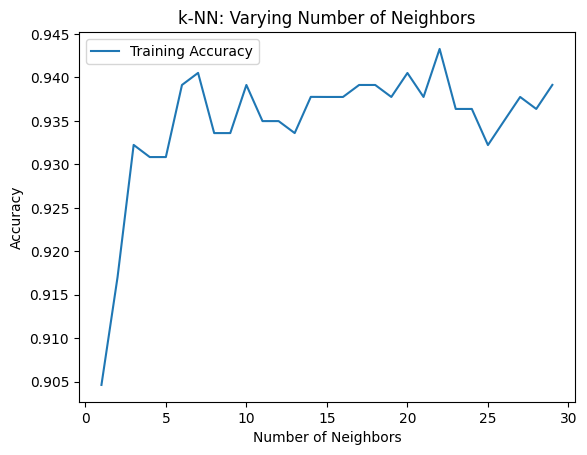

In [35]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    
    #Compute accuracy on the training set
    train_accuracy[i] = np.mean(cv_scores)

    #Compute accuracy on the testing set
    #test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
#plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [36]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [37]:
knn_gscv.best_params_

{'n_neighbors': 22}

In [38]:
knn_gscv.best_score_

0.9432854406130268

In [39]:
y_score = knn_gscv.fit(X_train, y_train).predict_proba(X_test)
y_predict = knn_gscv.fit(X_train, y_train).predict(X_test)

/home/haziqfaiz/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


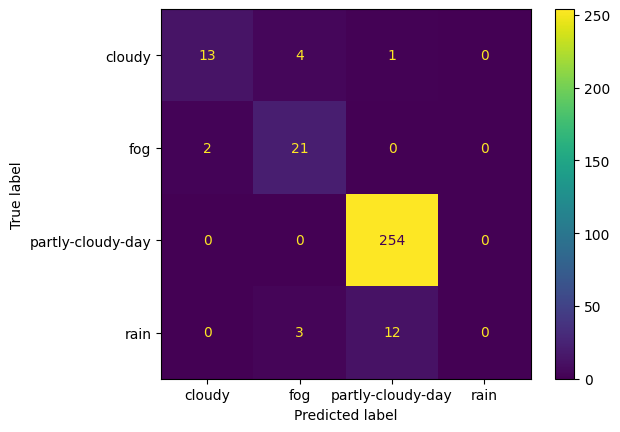

In [41]:
plot_confusion_matrix(knn_gscv.best_estimator_, X_test, y_test)

In [42]:
y_test_bin = label_binarize(y_test, classes=["rain","cloudy","fog","partly-cloudy-day"])
n_classes = y_test_bin.shape[1]

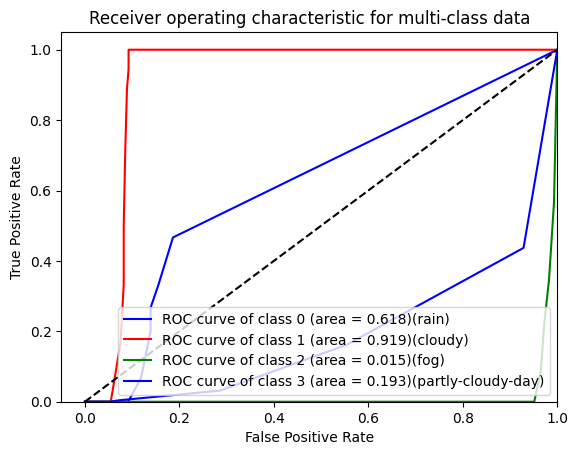

In [43]:
fpr = dict()
tpr = dict()
roc_auc = dict()
classes_name=["rain","cloudy","fog","partly-cloudy-day"]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"ROC curve of class {i} (area = {roc_auc[i]:.3f})({classes_name[i]})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

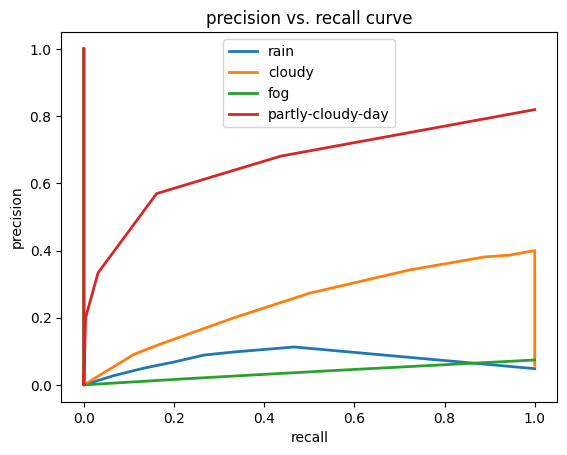

In [44]:
classes_name=["rain","cloudy","fog","partly-cloudy-day"]
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(classes_name[i]))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

### We train the same model but this time we transform the original dataset using random oversampling. The minority classes will be randomly oversampled to fix the imbalanced issue.

In [66]:
oversample = RandomOverSampler(sampling_strategy="auto")
X_over, y_over = oversample.fit_resample(X, y)

In [67]:
Counter(y_over)

Counter({'cloudy': 3019, 'fog': 3019, 'rain': 3019, 'partly-cloudy-day': 3019})

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state=1)

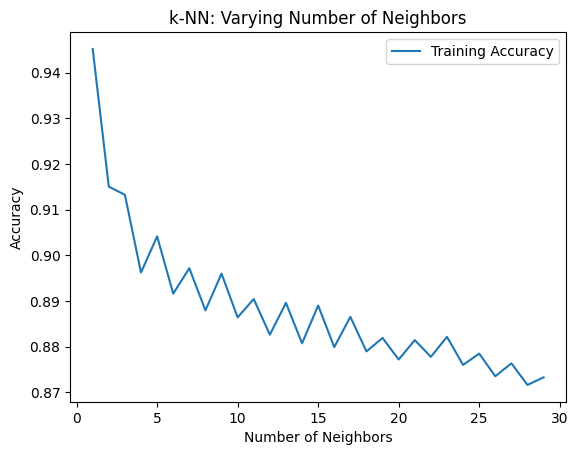

In [69]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    
    #Compute accuracy on the training set
    train_accuracy[i] = np.mean(cv_scores)

    #Compute accuracy on the testing set
    #test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
#plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [70]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [71]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [72]:
knn_gscv.best_score_

0.9452266961533212

In [73]:
y_score = knn_gscv.fit(X_train, y_train).predict_proba(X_test)
y_predict = knn_gscv.fit(X_train, y_train).predict(X_test)

/home/haziqfaiz/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


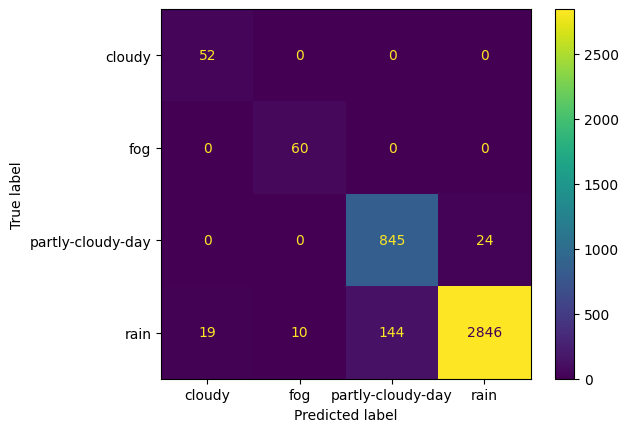

In [74]:
plot_confusion_matrix(knn_gscv.best_estimator_, X, y)

In [75]:
y_test_bin = label_binarize(y_test, classes=["rain","cloudy","fog","partly-cloudy-day"])
n_classes = y_test_bin.shape[1]

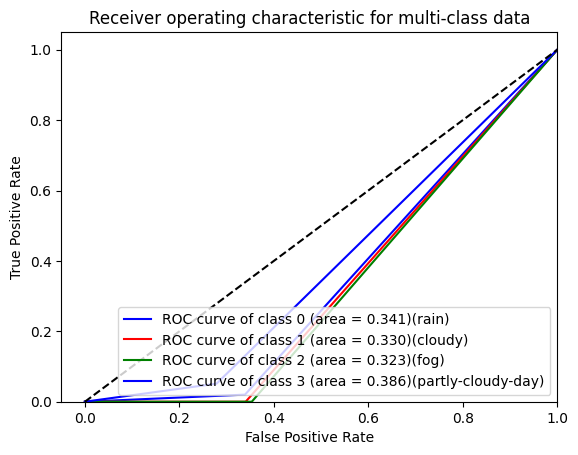

In [76]:
fpr = dict()
tpr = dict()
roc_auc = dict()
classes_name=["rain","cloudy","fog","partly-cloudy-day"]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"ROC curve of class {i} (area = {roc_auc[i]:.3f})({classes_name[i]})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

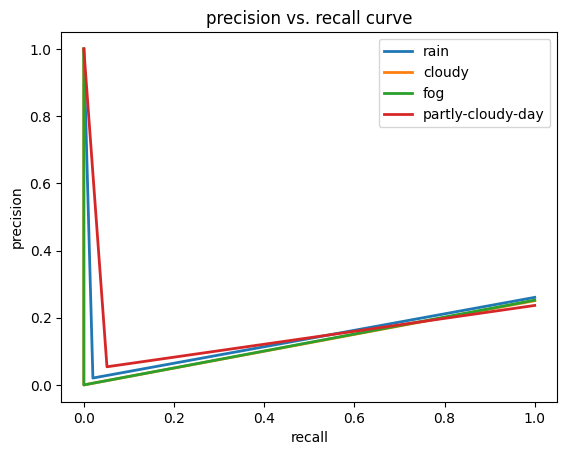

In [77]:
classes_name=["rain","cloudy","fog","partly-cloudy-day"]
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(classes_name[i]))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# 3. CLASSIFICATION

### sembang sikit

# 4. ASSOCIATION MINING

### sembang sikit